In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import os


In [3]:
df = pd.read_csv('train.csv', nrows = 1000000)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999998 entries, 0 to 999997
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   row_id                          999998 non-null  int64  
 1   timestamp                       999998 non-null  int64  
 2   user_id                         999998 non-null  int64  
 3   content_id                      999998 non-null  int64  
 4   content_type_id                 999998 non-null  int64  
 5   task_container_id               999998 non-null  int64  
 6   user_answer                     999998 non-null  int64  
 7   answered_correctly              999998 non-null  int64  
 8   prior_question_elapsed_time     976275 non-null  float64
 9   prior_question_had_explanation  996182 non-null  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 76.3+ MB


In [5]:
df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [6]:
dfl = pd.read_csv('lectures.csv')

In [7]:
dfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [8]:
dfl.head(3)

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept


In [10]:
dfq = pd.read_csv('questions.csv')
dfq.describe()

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


In [11]:
LECTURES

NameError: name 'LECTURES' is not defined

In [12]:
dfl.shape

(418, 4)

In [13]:
dfl.head(3)

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept


In [14]:
dfl.isna().sum()

lecture_id    0
tag           0
part          0
type_of       0
dtype: int64

In [15]:
dfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [16]:
dfl[['type_of','part','lecture_id']].groupby(['type_of','part'], as_index = False).count().sort_values(by=['type_of', 'part'])

,type_of,part,lecture_id
0,concept,1,20
1,concept,2,18
2,concept,3,7
3,concept,4,19
4,concept,5,72
5,concept,6,63
6,concept,7,23
7,intention,2,7
8,solving question,1,34
9,solving question,2,31


<Axes: xlabel='tag', ylabel='part'>

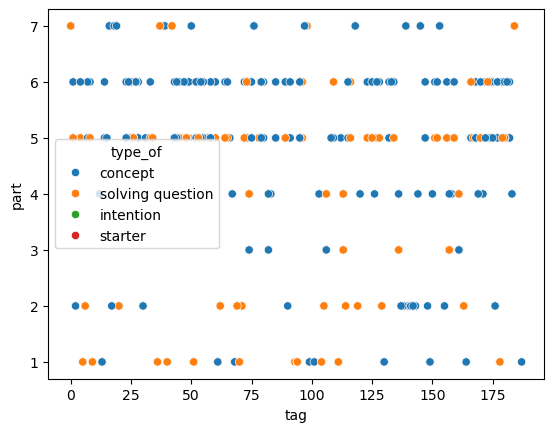

In [17]:
sns.scatterplot(data = dfl, x = 'tag', y = 'part', hue = 'type_of')

<Axes: xlabel='tag', ylabel='Count'>

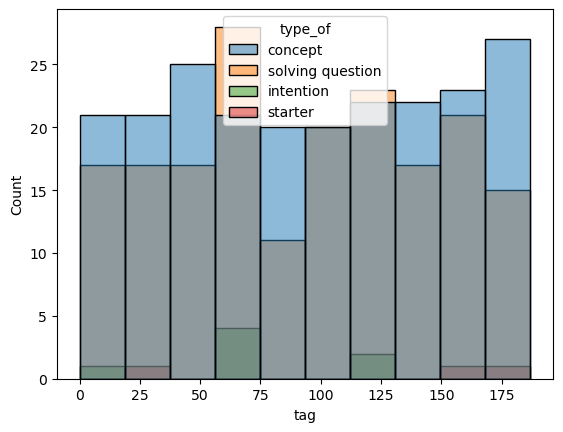

In [18]:
sns.histplot(data=dfl,x='tag', hue = 'type_of')

<Axes: xlabel='part', ylabel='Count'>

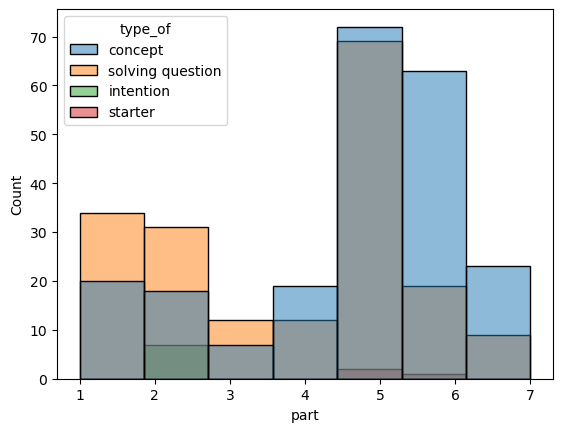

In [19]:
sns.histplot(data=dfl,x='part', hue = 'type_of', bins=7)

In [ ]:
QUESTION

In [20]:
dfq.head(3)

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92


In [21]:
dfq.isna().sum()

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64

In [22]:
dfq[dfq.tags.isna()]

,question_id,bundle_id,correct_answer,part,tags
10033,10033,10033,2,6,NaN


In [23]:
dfq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [24]:
dfq[['part','question_id']].groupby(['part'], as_index=False).count()

,part,question_id
0,1,992
1,2,1647
2,3,1562
3,4,1439
4,5,5511
5,6,1212
6,7,1160


<Axes: xlabel='part', ylabel='Count'>

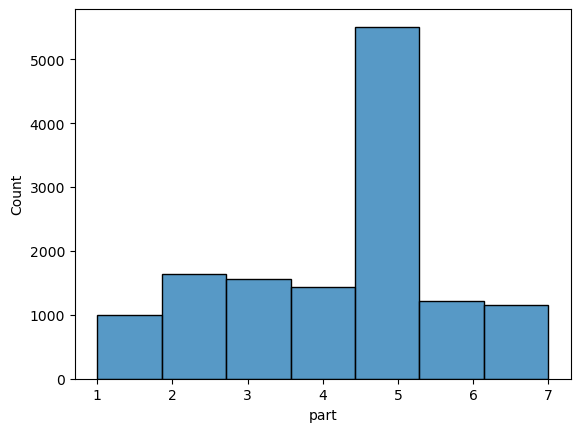

In [25]:
sns.histplot(data=dfq, x = 'part', bins=7)

In [ ]:
TRAIN

In [26]:
df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999998 entries, 0 to 999997
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   row_id                          999998 non-null  int64  
 1   timestamp                       999998 non-null  int64  
 2   user_id                         999998 non-null  int64  
 3   content_id                      999998 non-null  int64  
 4   content_type_id                 999998 non-null  int64  
 5   task_container_id               999998 non-null  int64  
 6   user_answer                     999998 non-null  int64  
 7   answered_correctly              999998 non-null  int64  
 8   prior_question_elapsed_time     976275 non-null  float64
 9   prior_question_had_explanation  996182 non-null  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 76.3+ MB


In [28]:
df.agg({'user_id' : pd.Series.nunique})

user_id    3824
dtype: int64

In [29]:
user_answer  = df[['user_id', 'user_answer', 'answered_correctly']]\
.groupby(['user_id'], as_index = False).sum()

In [30]:
user_answer.describe()

,user_id,user_answer,answered_correctly
count,3.824000e+03,3824.000000,3824.000000
mean,1.050633e+07,359.513860,161.481172
std,5.958653e+06,984.492535,457.802761
min,1.150000e+02,1.000000,-2.000000
25%,5.363199e+06,38.000000,11.000000
50%,1.061051e+07,60.000000,23.000000
75%,1.565077e+07,219.000000,94.000000
max,2.094902e+07,16907.000000,6103.000000


In [31]:
def remove_outliers(df,col,n_std):
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
        return df

user_answer = remove_outliers(user_answer, 'user_answer', 1)

user_answer['cor'] = user_answer['answered_correctly']/user_answer['user_answer']
user_answer.rename(columns={'user_answer':'number_of_answers_per_user'}, inplace=True)
user_answer.describe()

,user_id,number_of_answers_per_user,answered_correctly,cor
count,3.585000e+03,3585.000000,3585.000000,3585.000000
mean,1.052197e+07,159.401953,68.483682,0.383758
std,5.961041e+06,238.836800,111.890436,0.131746
min,1.150000e+02,1.000000,-2.000000,-0.017241
25%,5.386918e+06,36.000000,11.000000,0.293103
50%,1.062930e+07,55.000000,21.000000,0.392857
75%,1.568217e+07,151.000000,66.000000,0.472603
max,2.094902e+07,1335.000000,759.000000,1.500000


55.0


<Axes: xlabel='number_of_answers_per_user', ylabel='Count'>

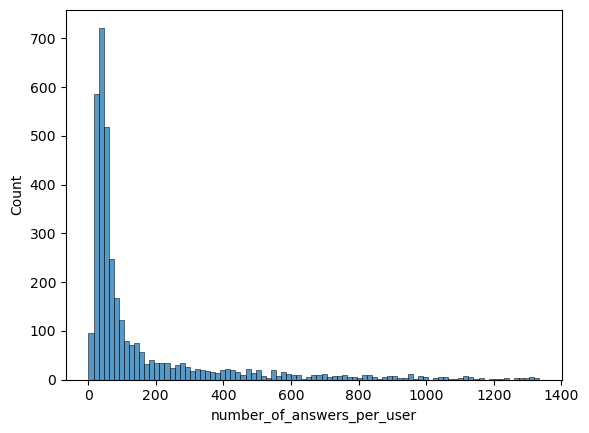

In [32]:
print(user_answer.number_of_answers_per_user.median())
sns.histplot(data = user_answer, x = 'number_of_answers_per_user')

<Axes: xlabel='number_of_answers_per_user', ylabel='Count'>

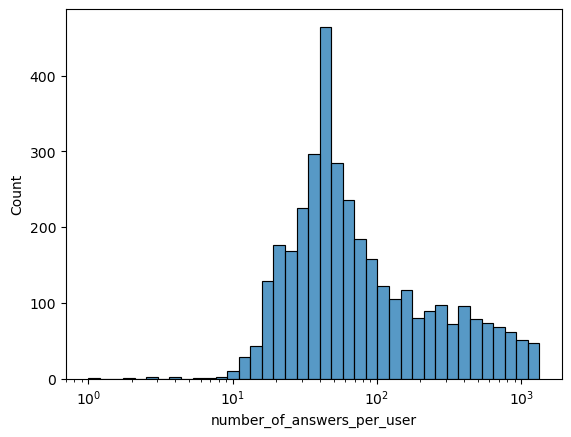

In [33]:
sns.histplot(data = user_answer, x = 'number_of_answers_per_user', log_scale = True)

0.42857142857142855


<Axes: >

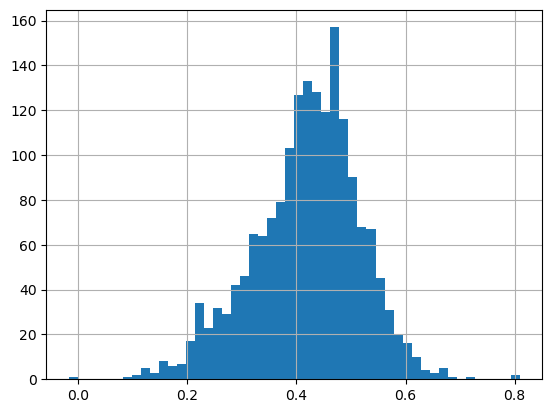

In [34]:
print(user_answer.query('number_of_answers_per_user > 55')['cor'].median())
user_answer.query('number_of_answers_per_user > 55')['cor'].hist(bins=50)

0.4507042253521127


<Axes: >

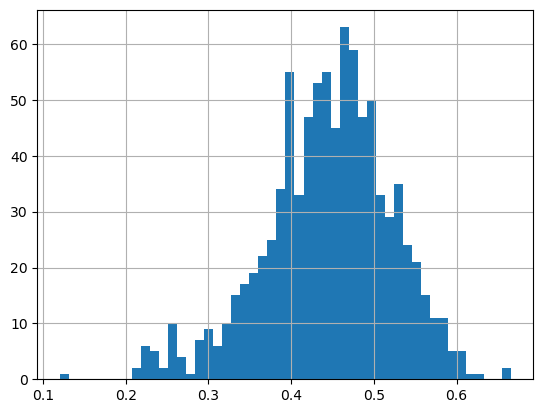

In [35]:
print(user_answer.query('number_of_answers_per_user > 151')['cor'].median())
user_answer.query('number_of_answers_per_user > 151')['cor'].hist(bins=50)

0.4578313253012048


<Axes: >

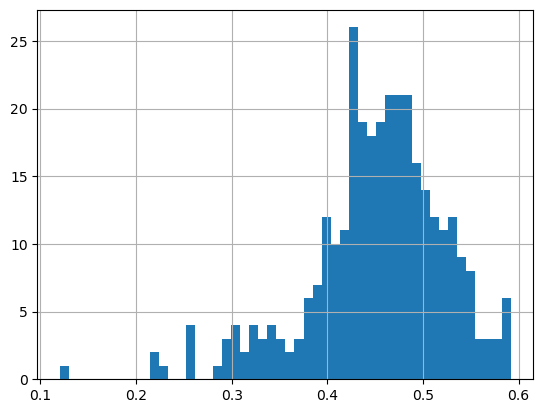

In [36]:
print(user_answer.query('number_of_answers_per_user > 500')['cor'].median())
user_answer.query('number_of_answers_per_user > 500')['cor'].hist(bins=50)

0.3333333333333333


<Axes: >

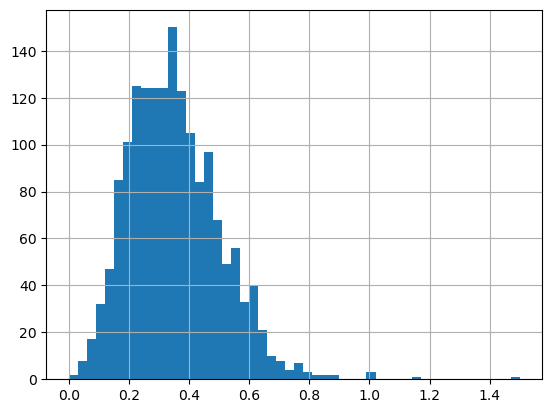

In [37]:
print(user_answer.query('number_of_answers_per_user <=50')['cor'].median())
user_answer.query('number_of_answers_per_user <=50')['cor'].hist(bins=50)

In [38]:
looking_for_corr = df[['user_id', 'user_answer', 'answered_correctly', 'prior_question_elapsed_time']].groupby(['user_id'], as_index = False).sum()
looking_for_corr['prior_question_elapsed_time'] = looking_for_corr['prior_question_elapsed_time']/looking_for_corr['user_answer']
looking_for_corr['answered_correctly'] = looking_for_corr['answered_correctly']/looking_for_corr['user_answer']
looking_for_corr.drop('user_id', axis =1, inplace = True)
looking_for_corr = remove_outliers(looking_for_corr, 'user_answer', 1)
looking_for_corr.rename(columns = {'user_answer':'number_of_answers_per_user'}, inplace = True)
looking_for_corr.shape
looking_for_corr

,number_of_answers_per_user,answered_correctly,prior_question_elapsed_time
0,72,0.444444,12458.319444
1,49,0.142857,11122.387755
2,31,0.322581,10483.870968
3,169,0.479290,26449.704142
4,149,0.449664,18923.489933
...,...,...,...
3819,575,0.405217,19102.003478
3820,20,0.350000,18200.000000
3821,739,0.416779,16015.966171
3822,78,0.397436,12730.769231


<Axes: xlabel='number_of_answers_per_user', ylabel='answered_correctly'>

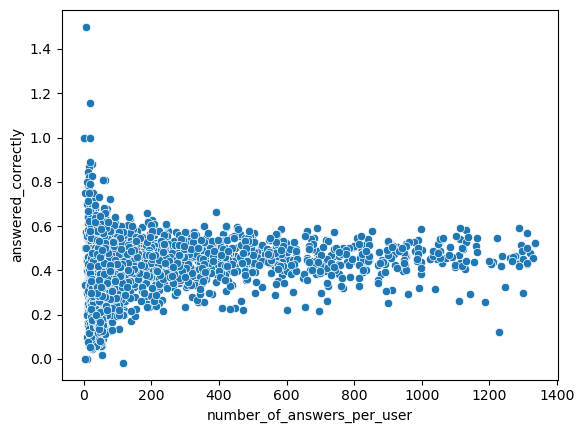

In [39]:
sns.scatterplot(data = looking_for_corr, x ='number_of_answers_per_user',\
                        y = 'answered_correctly' )

<Axes: xlabel='prior_question_elapsed_time', ylabel='answered_correctly'>

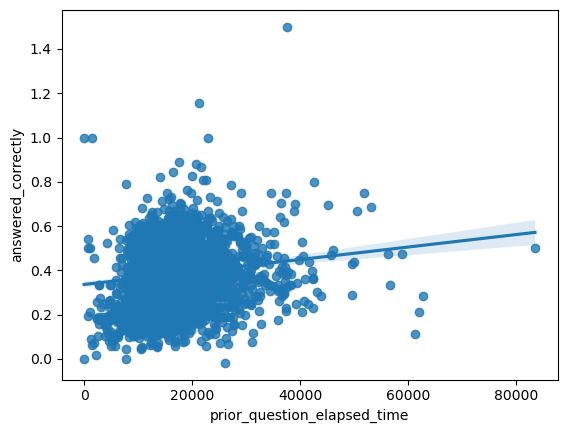

In [40]:
sns.regplot(data = looking_for_corr, x ='prior_question_elapsed_time',\
            y = 'answered_correctly' )

In [ ]:
import numpy as np

# Создаем массив чисел
x = np.array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

# Вычисляем дисперсию
variance = np.var(x)

# Выводим результат
print(variance)